In [1]:
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma

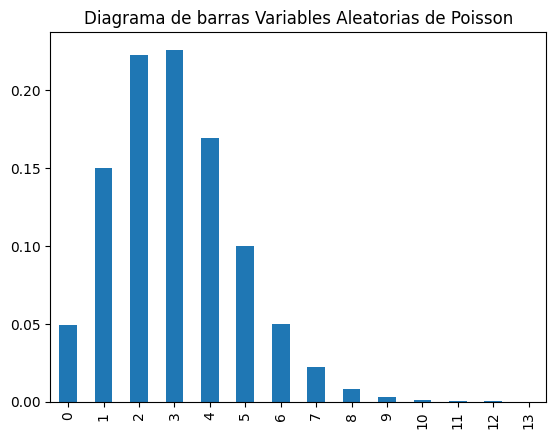

In [32]:
# Generar 1000 variables aleatorias de Poisson
lambda_val = 3  # Tasa promedio de ocurrencia
variables_aleatorias = poisson.rvs(mu=lambda_val, size=100000)

ser_var = pd.Series(variables_aleatorias)
bars = ser_var.value_counts()/len(ser_var)
bars = bars.sort_index()

# Graficar el diagrama de barras
bars.plot(kind='bar')

# Mostrar el gráfico
plt.title('Diagrama de barras Variables Aleatorias de Poisson')
plt.show()

In [13]:
muestra  = np.random.choice(variables_aleatorias, size=50, replace=False)
muestra

array([3, 2, 3, 1, 2, 5, 7, 5, 2, 4, 2, 2, 5, 3, 2, 4, 0, 2, 2, 5, 2, 3,
       1, 1, 2, 5, 5, 2, 8, 3, 5, 4, 1, 9, 5, 1, 3, 1, 1, 3, 7, 4, 4, 6,
       2, 6, 4, 2, 4, 5])

In [14]:
muestra.sort()

In [15]:
muestra

array([0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 7, 7, 8, 9])

In [19]:
array_list = []
mean_list = []

for i in range(2000):
    muestra  = np.random.choice(variables_aleatorias, size=20, replace=False)
    array_list.append(muestra)
    mean_list.append(muestra.mean())

array_list = np.array(array_list)
array_list.shape

(2000, 20)

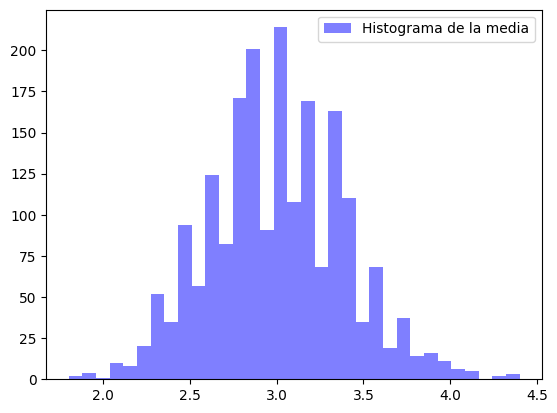

In [31]:
plt.hist(mean_list, bins= 'auto', alpha=0.5, color='b', label='Histograma de la media')
plt.legend()


(array([511., 861., 401., 158.,  46.,  17.,   2.,   2.,   1.,   1.]),
 array([ 0.13862357,  5.19712285, 10.25562213, 15.31412142, 20.3726207 ,
        25.43111998, 30.48961927, 35.54811855, 40.60661783, 45.66511712,
        50.7236164 ]),
 <BarContainer object of 10 artists>)

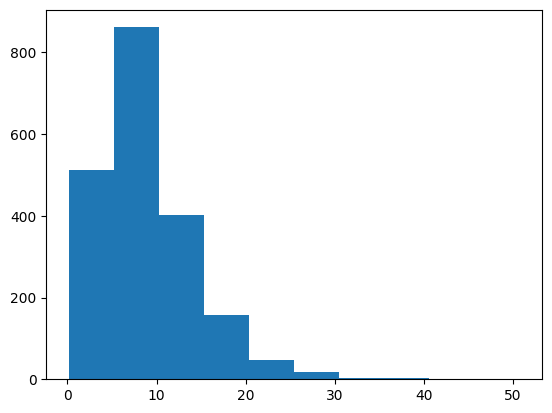

In [28]:
from scipy.stats import gamma
gamma_array = gamma.rvs(a=3, size=2000, scale=3)
plt.hist(gamma_array)

# Introducción a la Inferencia Estadística

## Conceptos Básicos

* Población
* Muestra
* Parámetro
* Estadístico
* Variable aleatoria
* Distribuciones de probabilidad

## ¿Cuál es el objetivo de la inferencia?

La inferencia estadística es una rama de la estadística que se ocupa de tomar decisiones o realizar predicciones sobre una población, basándose en muestras extraídas de dicha población.

Utilizando métodos de recolección de datos y teoría de probabilidad, la inferencia estadística permite estimar parámetros poblacionales, probar hipótesis y modelar relaciones entre variables con un cierto grado de confianza.

 El objetivo principal es hacer generalizaciones válidas y precisas desde una muestra limitada a toda la población, proporcionando una base científica para la toma de decisiones en presencia de incertidumbre. Esto es esencial en campos tan diversos como la medicina, las ciencias sociales, la ecología y la ingeniería industrial, donde las decisiones se basan en patrones y comportamientos observados en muestras representativas.

### Ejemplo

Un fabricante de neumáticos elabora un nuevo modelo que tendrá mayor duración que los actuales neumáticos de la empresa. Para estimar la **duración media**, en millas, el fabricante selecciona una *muestra* de 120 neumáticos nuevos para probarlos. De los resultados de esta prueba se obtiene una duración media de 36 500 millas. Por tanto, una estimación de la duración media, en millas, de la población de nuevos neumáticos es 36 500 millas.


# Muestreo

Seleccionar muestras en lugar de censar toda la población es una práctica común en estadística por varias razones prácticas y teóricas. Por qué es a menudo preferible utilizar el muestreo:

1. **Costo y Recursos**
Censar toda la población puede ser extremadamente costoso y logísticamente inviable. El muestreo, por otro lado, permite a los investigadores obtener resultados comparables con una inversión significativamente menor en tiempo, personal y dinero. Por ejemplo, considera el costo y la logística de entrevistar a todos los votantes en un país versus tomar una muestra representativa de estos.

2. **Eficiencia**
El muestreo es mucho más rápido que intentar censar toda la población. Esto es crucial en situaciones donde el tiempo es un factor importante, como en estudios que necesitan datos actuales para ser relevantes. Por ejemplo, en estudios de mercado o encuestas de opinión pública, obtener información rápidamente puede ser más valioso que tener una cobertura completa.

3. **Factibilidad**
En muchas situaciones, simplemente no es posible estudiar toda la población. Algunas poblaciones son inaccesibles debido a su tamaño o naturaleza. Por ejemplo, estudios que involucran fenómenos naturales o poblaciones en áreas de conflicto o de difícil acceso geográfico. En ciencias naturales, censar toda la población podría significar destruir el hábitat (p.ej., cortar todos los árboles para contar especies de insectos).

4. **Calidad de los Datos**
Paradójicamente, muestrear puede conducir a datos de mayor calidad. Un censo completo puede sufrir de errores de recopilación debido a la fatiga del personal, la inconsistencia en la aplicación de métodos, o la simplificación de procesos para acelerar el trabajo. Con muestras más manejables, se pueden controlar mejor la calidad y la precisión de la recopilación de datos.

5. **Destrucción del Elemento de Prueba**
En algunos casos, examinar un elemento de la población significa destruirlo. Por ejemplo, en control de calidad en procesos industriales (como la fabricación de chips semiconductores o medicamentos), las pruebas de integridad a menudo implican destruir el producto para testear su durabilidad o calidad.

6. **Análisis Estadístico**
Los métodos estadísticos modernos son muy eficaces para hacer inferencias a partir de muestras pequeñas, gracias al desarrollo de la teoría estadística que incluye estimaciones de error y métodos de corrección. Los estadísticos pueden calcular con precisión los márgenes de error y los niveles de confianza para las estimaciones obtenidas de una muestra.

7. **Mejora del Diseño Experimental**
El muestreo permite a los investigadores diseñar experimentos que son éticamente aceptables y científicamente válidos. En muchos estudios médicos o psicológicos, por ejemplo, sería poco ético o inviable aplicar ciertos tratamientos a toda la población.

Por todas estas razones, el muestreo se presenta como una solución práctica y eficiente para muchos problemas de investigación en estadística. Permite obtener información suficiente para hacer inferencias estadísticas sólidas sobre una población completa con un compromiso razonable de recursos, tiempo y ética.


## Tipos de muestreo

### Muestreo Aleatorio Simple

El muestreo aleatorio simple es el método más básico y común de muestreo. En este método, cada miembro de la población tiene la misma **probabilidad de ser seleccionado en la muestra**. Esto significa que cada muestra de tamaño $n$ tiene la misma probabilidad de ser seleccionada de la población.



In [1]:
import random

# Población con 10 elementos
poblacion = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# Tamaño de la muestra
tam_muestra = 5

# Muestreo aleatorio simple
muestra = random.sample(poblacion, tam_muestra)

print("Muestra:", muestra)


Muestra: ['E', 'I', 'F', 'D', 'H']


### Muestreo Aleatorio Simple Sin Reemplazo

En este método, cada elemento seleccionado para la muestra es eliminado de la población para futuras selecciones. Esto significa que no puede ser vuelto a seleccionar, lo que reduce el tamaño de la población de donde se eligen los sucesivos elementos.

**Ventajas:**

* Cada miembro de la población tiene la misma probabilidad de ser elegido.
* Los resultados son muestras dependientes, ya que la selección de un miembro afecta la selección del siguiente.

**Implicaciones Estadísticas:**

La covarianza entre indicadores de selección para diferentes elementos de la muestra es negativa, pues la selección de un elemento disminuye la probabilidad de seleccionar otros.

**¿Cuándo usar?**

Este enfoque es muy común cuando el tamaño de la población es conocido y es relativamente pequeño.


### Muestreo Aleatorio Simple Con Reemplazo

En el muestreo con reemplazo, cada elemento seleccionado para la muestra es "reemplazado" en la población antes de realizar la siguiente selección, lo que significa que puede ser seleccionado más de una vez.

**Ventajas:**

* Simplifica el análisis estadístico porque todas las muestras son independientes entre sí.


**Implicaciones Estadísticas:**

La covarianza entre indicadores de selección para diferentes elementos de la muestra es cero, ya que la selección de un elemento no afecta la probabilidad de seleccionar ese mismo elemento u otros nuevamente.

**¿Cuándo usar?**

* Este método es particularmente útil en teoría y simulaciones estadísticas donde la independencia es crucial.
* Es útil cuando se trata de poblaciones muy pequeñas, ya que permite replicar la población a través de muestras repetidas.

In [2]:
import numpy as np

# Definir una población
poblacion = np.array([1, 2, 3, 4, 5])

# Muestreo sin reemplazo
muestra_sin_reemplazo = np.random.choice(poblacion, size=3, replace=False)
print("Muestra sin reemplazo:", muestra_sin_reemplazo)

# Muestreo con reemplazo
muestra_con_reemplazo = np.random.choice(poblacion, size=3, replace=True)
print("Muestra con reemplazo:", muestra_con_reemplazo)

Muestra sin reemplazo: [5 2 4]
Muestra con reemplazo: [2 5 2]


In [3]:
import numpy as np

# Definir una población
poblacion = np.array(["1", "2", "3", "4", "5"])

# Muestreo sin reemplazo
muestra_sin_reemplazo = np.random.choice(poblacion, size=3, replace=False)
print("Muestra sin reemplazo:", muestra_sin_reemplazo)

# Muestreo con reemplazo
muestra_con_reemplazo = np.random.choice(poblacion, size=3, replace=True)
print("Muestra con reemplazo:", muestra_con_reemplazo)

Muestra sin reemplazo: ['5' '3' '4']
Muestra con reemplazo: ['4' '1' '5']


In [4]:
import pandas as pd

# Crear un diccionario con los datos de las columnas
data = {
    'Empresa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Nombre': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'BB', 'CC', 'DD'],
    'Información': [True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


    Empresa Nombre  Información
0         1      A         True
1         2      B        False
2         3      C         True
3         4      D        False
4         5      E         True
5         6      F        False
6         7      G         True
7         8      H        False
8         9      I         True
9        10      J        False
10       11      K         True
11       12      L        False
12       13      M         True
13       14      N        False
14       15      O         True
15       16      P        False
16       17      Q         True
17       18      R        False
18       19      S         True
19       20      T        False
20       21      U         True
21       22      V        False
22       23      W         True
23       24      X        False
24       25      Y         True
25       26      Z        False
26       27     AA         True
27       28     BB        False
28       29     CC         True
29       30     DD        False


In [5]:
muestra_sin_reemplazo = df.sample(n=5, replace=False)
muestra_sin_reemplazo

,Empresa,Nombre,Información
5,6,F,False
11,12,L,False
18,19,S,True
10,11,K,True
26,27,AA,True


In [7]:
muestra_con_reemplazo = df.sample(n=5, replace=True)
muestra_con_reemplazo

,Empresa,Nombre,Información
11,12,L,False
19,20,T,False
21,22,V,False
16,17,Q,True
9,10,J,False


In [8]:
import pandas as pd
import numpy as np

# Generar datos para las variables cualitativas
mes = np.random.choice(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo'], size=30)
articulo = np.random.choice(['Camiseta', 'Pantalón', 'Camisa'], size=30)
color = np.random.choice(['Amarillo', 'Rojo', 'Verde'], size=30)

# Generar datos para las variables cuantitativas
dia = np.random.randint(1, 30, size=30)
precio_venta = np.random.uniform(5, 10, size=30)
costo = np.random.normal(6, 1, size=30)

# Crear el DataFrame
df = pd.DataFrame({
    'Artículo': articulo,
    'Color': color,
    'Ventas': precio_venta,
    'Costo': costo,
    'Mes': mes,
    'Día': dia
})

# Mostrar el DataFrame
print(df)

    Artículo     Color    Ventas     Costo      Mes  Día
0   Pantalón     Verde  9.667737  4.629053    Marzo   24
1     Camisa  Amarillo  8.315659  4.406477     Mayo   13
2     Camisa      Rojo  8.135164  6.022882     Mayo    5
3     Camisa     Verde  5.127384  7.518286    Enero   24
4     Camisa  Amarillo  9.077968  4.374220    Marzo   24
5     Camisa      Rojo  7.394985  6.650992     Mayo    3
6   Camiseta      Rojo  8.080078  6.861152  Febrero    7
7     Camisa      Rojo  5.176345  7.542904    Marzo    2
8     Camisa  Amarillo  7.277017  6.638340    Abril    7
9   Pantalón     Verde  9.113409  4.633261    Marzo   27
10    Camisa  Amarillo  9.288702  5.469984    Abril   14
11  Camiseta      Rojo  8.390845  7.225094     Mayo   16
12  Camiseta      Rojo  9.798170  5.542429  Febrero   19
13  Pantalón      Rojo  9.683766  5.696866     Mayo   18
14  Camiseta      Rojo  7.673643  6.376603    Marzo   28
15  Pantalón      Rojo  7.562470  6.593111     Mayo   23
16    Camisa      Rojo  5.25226

In [11]:
muestra_sin_reemplazo = df.sample(n=5, replace=False)
muestra_sin_reemplazo

,Artículo,Color,Ventas,Costo,Mes,Día
28,Camiseta,Verde,7.431593,7.437958,Febrero,4
20,Pantalón,Amarillo,7.455448,6.820696,Marzo,19
13,Pantalón,Rojo,9.683766,5.696866,Mayo,18
29,Pantalón,Rojo,8.684754,6.231805,Abril,9
12,Camiseta,Rojo,9.798170,5.542429,Febrero,19


## Muestreo estratificado

El muestreo estratificado es un método de muestreo en el que la población se divide en subgrupos o estratos y se toma una muestra de cada estrato.

**¿cuándo usar?**

Este método se utiliza cuando la población es heterogénea y se desea que la muestra sea representativa de cada estrato.

**Ventajas:**

* Asegura que cada subgrupo de la población esté representado en la muestra.
* Permite comparar subgrupos de la población.
* Aumenta la precisión de la estimación de parámetros poblacionales.

**Desventajas:**

* Requiere información precisa sobre la población y sus estratos.
* Puede presentar sesgos si los estratos no están claramente definidos o si no se tiene información precisa sobre la población.
* Es más complicado y costoso que el muestreo aleatorio simple.






**Pasos para el muestreo estratificado**

1. **Dividir la población en estratos**. Los estratos deben ser mutuamente excluyentes y colectivamente exhaustivos, es decir, cada miembro de la población debe pertenecer a un solo estrato y todos los miembros de la población deben pertenecer a al menos un estrato.

2. **Determinar el tamaño de la muestra para cada estrato**. El tamaño de la muestra para cada estrato debe ser proporcional al tamaño del estrato en la población.

3. **Seleccionar una muestra aleatoria de cada estrato**. Seleccionar una muestra aleatoria simple de cada estrato, utilizando métodos de muestreo aleatorio simple.

4. **Combinar las muestras de cada estrato**. Combinar las muestras de cada estrato para formar la muestra final.

In [12]:
import numpy as np

# Obtener valores únicos de la variable 'articulo'
estratos = np.unique(df['Artículo'])
# Data frame vacío para almacenar la muestra estratificada
muestra_estratificada = pd.DataFrame()

# Iterar sobre los estratos
for estrato in estratos:
    # Filtrar elementos del estrato actual
    elementos_estrato = df[df['Artículo'] == estrato]

    # Seleccionar 2 elementos aleatorios del estrato actual
    muestra_estrato = elementos_estrato.sample(2)
    #
    muestra_estratificada=pd.concat([muestra_estratificada, muestra_estrato], ignore_index=True)


# Mostrar la muestra estratificada
print(muestra_estratificada)


   Artículo     Color    Ventas     Costo      Mes  Día
0    Camisa      Rojo  7.394985  6.650992     Mayo    3
1    Camisa  Amarillo  6.602691  5.937521    Abril   20
2  Camiseta     Verde  7.661688  4.291789    Abril   17
3  Camiseta     Verde  7.431593  7.437958  Febrero    4
4  Pantalón      Rojo  8.684754  6.231805    Abril    9
5  Pantalón     Verde  9.122074  5.348421    Abril   10


In [13]:
import numpy as np

# Obtener valores únicos de la variable 'articulo'
estratos = np.unique(df['Color'])
# Data frame vacío para almacenar la muestra estratificada
muestra_estratificada = pd.DataFrame()

# Iterar sobre los estratos
for estrato in estratos:
    # Filtrar elementos del estrato actual
    elementos_estrato = df[df['Color'] == estrato]

    # Seleccionar 2 elementos aleatorios del estrato actual
    muestra_estrato = elementos_estrato.sample(2)
    #
    muestra_estratificada=pd.concat([muestra_estratificada, muestra_estrato], ignore_index=True)


# Mostrar la muestra estratificada
print(muestra_estratificada)

   Artículo     Color    Ventas     Costo      Mes  Día
0  Pantalón  Amarillo  7.455448  6.820696    Marzo   19
1    Camisa  Amarillo  7.277017  6.638340    Abril    7
2  Pantalón      Rojo  9.683766  5.696866     Mayo   18
3    Camisa      Rojo  8.135164  6.022882     Mayo    5
4  Camiseta     Verde  7.431593  7.437958  Febrero    4
5  Pantalón     Verde  7.768556  6.142817  Febrero   17


## Muestreo por conglomerados

El muestreo por conglomerados es un método de muestreo en el que la población se divide en grupos o conglomerados y se toma una muestra de algunos de estos conglomerados. Los conglomerados pueden ser geográficos, temporales, o basados en otros criterios.

**¿Qué es un conglomerado?**

Un conglomerado es un grupo de elementos de la población que comparten características similares. Los conglomerados deben ser mutuamente excluyentes y colectivamente exhaustivos, es decir, cada miembro de la población debe pertenecer a un solo conglomerado y todos los miembros de la población deben pertenecer a al menos un conglomerado.

A diferencia del muestreo estratificado, donde cada estrato debe ser homogéneo y los estratos entre sí deben ser heterogéneos, el muestreo por conglomerados trata de dividir la población en grupos heterogéneos que son internamente heterogéneos. Cada uno de estos grupos o conglomerados es un pequeño reflejo de la población completa

**¿Cuándo usar?**

Este método se utiliza cuando la población es muy grande y dispersa, y es difícil o costoso seleccionar una muestra aleatoria simple de toda la población.

**Ventajas:**

* Reduce los costos y el tiempo de muestreo.
* Facilita la logística de la recolección de datos.
* Aumenta la eficiencia del muestreo.

**Desventajas:**

* Puede introducir sesgos si los conglomerados no son representativos de la población.
* Puede aumentar la varianza de la estimación de los parámetros poblacionales.

**Pasos para el muestreo por conglomerados**

1. **Dividir la población en conglomerados**. Los conglomerados deben ser mutuamente excluyentes y colectivamente exhaustivos, es decir, cada miembro de la población debe pertenecer a un solo conglomerado y todos los miembros de la población deben pertenecer a al menos un conglomerado.

2. **Determinar el tamaño de la muestra para cada conglomerado**. El tamaño de la muestra para cada conglomerado debe ser proporcional al tamaño del conglomerado en la población.

3. **Seleccionar una muestra aleatoria de conglomerados**. Seleccionar una muestra aleatoria simple de algunos de los conglomerados, utilizando métodos de muestreo aleatorio simple.

4. **Seleccionar una muestra aleatoria de elementos dentro de los conglomerados seleccionados**. Seleccionar una muestra aleatoria simple de elementos dentro de los conglomerados seleccionados.

5. **Combinar las muestras de elementos de cada conglomerado**. Combinar las muestras de elementos de cada conglomerado para formar la muestra final.





In [21]:
# Definir el número de conglomerados a seleccionar
n_conglomerados = 2

# Seleccionar artículos aleatoriamente
articulos_seleccionadas = np.random.choice(df['Artículo'].unique(), n_conglomerados, replace=False)

# Filtrar el DataFrame para incluir solo estudiantes de las escuelas seleccionadas
df_muestreo_conglomerados = df[df['Artículo'].isin(articulos_seleccionadas)]

print(df_muestreo_conglomerados)


    Artículo     Color    Ventas     Costo      Mes  Día
1     Camisa  Amarillo  8.315659  4.406477     Mayo   13
2     Camisa      Rojo  8.135164  6.022882     Mayo    5
3     Camisa     Verde  5.127384  7.518286    Enero   24
4     Camisa  Amarillo  9.077968  4.374220    Marzo   24
5     Camisa      Rojo  7.394985  6.650992     Mayo    3
6   Camiseta      Rojo  8.080078  6.861152  Febrero    7
7     Camisa      Rojo  5.176345  7.542904    Marzo    2
8     Camisa  Amarillo  7.277017  6.638340    Abril    7
10    Camisa  Amarillo  9.288702  5.469984    Abril   14
11  Camiseta      Rojo  8.390845  7.225094     Mayo   16
12  Camiseta      Rojo  9.798170  5.542429  Febrero   19
14  Camiseta      Rojo  7.673643  6.376603    Marzo   28
16    Camisa      Rojo  5.252264  6.220707  Febrero   17
17  Camiseta     Verde  7.661688  4.291789    Abril   17
18  Camiseta      Rojo  8.345899  6.218714    Enero   29
21    Camisa      Rojo  5.544053  6.914838    Abril    2
22    Camisa  Amarillo  6.60269

In [22]:
# Obtener valores únicos de la variable 'articulo'
conglomerados = np.unique(df_muestreo_conglomerados['Artículo'])
# Data frame vacío para almacenar la muestra estratificada
muestra_conglomerados = pd.DataFrame()

# Iterar sobre los conglomerados
for conglomerado in conglomerados:
    # Filtrar elementos del estrato actual
    elementos_conglomerado = df[df['Artículo'] == conglomerado]

    # Seleccionar  elementos aleatorios del estrato actual
    s =int(len(elementos_conglomerado)*0.4)
    muestra_conglomerado = elementos_conglomerado.sample(s)
    #
    muestra_conglomerados=pd.concat([muestra_conglomerados, muestra_conglomerado], ignore_index=True)


# Mostrar la muestra estratificada
print(muestra_conglomerados)

   Artículo     Color    Ventas     Costo      Mes  Día
0    Camisa     Verde  5.609888  6.598140     Mayo   15
1    Camisa      Rojo  7.394985  6.650992     Mayo    3
2    Camisa  Amarillo  6.602691  5.937521    Abril   20
3    Camisa  Amarillo  9.288702  5.469984    Abril   14
4    Camisa      Rojo  5.252264  6.220707  Febrero   17
5  Camiseta     Verde  7.431593  7.437958  Febrero    4
6  Camiseta      Rojo  8.390845  7.225094     Mayo   16
7  Camiseta      Rojo  8.080078  6.861152  Febrero    7


### Muestreo Sistemático

El muestreo sistemático es un método de muestreo en el que los elementos de la población se seleccionan a intervalos regulares. El intervalo de muestreo se calcula dividiendo el tamaño de la población por el tamaño de la muestra.

**¿Cuándo usar?**

Particularmente útil cuando se tiene una lista ordenada de la población y se desea una metodología de muestreo más simple que el muestreo aleatorio simple, pero que sigue proporcionando una buena representación de la población total.

**Ventajas:**

* Es más eficiente que el muestreo aleatorio simple.
* Es más fácil de implementar que el muestreo aleatorio simple.

**Desventajas:**

* Puede introducir sesgos si hay un patrón en la población que coincide con el intervalo de muestreo.
* Puede ser menos preciso que el muestreo aleatorio simple si el patrón en la población no es aleatorio.

**Pasos para el muestreo sistemático**

1. **Definir el Tamaño de la Población ($N$) y Ordenar la población** Determinar cuántos elementos hay en total en la población, luego, ordenar la población de acuerdo con un criterio específico, como el tamaño, la edad, la ubicación, etc.

2. **Determinar el Tamaño de la Muestra ($n$):** Decidir cuántos elementos deseas incluir en la muestra.

2. **Calcular el intervalo de muestreo**. Calcular el intervalo de muestreo dividiendo el tamaño de la población $(N)$por el tamaño de la muestra (n). Se toma el mayor entero al cociente.

$$k = \left\lfloor \frac{N}{n} \right\rfloor$$

3. **Seleccionar un número aleatorio entre 1 y $k$**. Seleccionar un número aleatorio entre 1 y $k$, este número representará el primer elemento de la muestra.

4. **Seleccionar los elementos de la muestra**. Comenzando con el primer elemento seleccionado aleatoriamente se selecciona cada $k$-ésimo elemento en la lista de la población hasta que hayas seleccionado $n$ elementos.

5. **Combinar los elementos seleccionados para formar la muestra final**. Combinar los elementos seleccionados para formar la muestra final.





# Ejemplo

Supongamos que una empresa quiere realizar una encuesta de satisfacción entre sus empleados, que son 1000 en total, y decide usar muestreo sistemático para seleccionar 100 empleados:

* Tamaño de la Población $N$: 1000 empleados.
* Tamaño de la Muestra $n$: 100 empleados.
* Intervalo de Muestreo $k$:

$$
k = \cfrac{1000}{100} = 10
$$

Punto de Partida Aleatorio: Supongamos que el número aleatorio entre 1 y 10 es 7.

Entonces, el muestreo comenzará con el empleado número 7 y continuará seleccionando cada décimo empleado: 7, 17, 27, ..., 997.

In [25]:
# Tamaño de la población
N=len(df)

# Tamaño de la muestra
n = 5

# Intervalo de muestreo
k=N // n


# Elegir un punto de partida aleatorio entre 0 y k-1
start = np.random.randint(0, k)

# Seleccionar los índices de la muestra sistemática
indices = np.arange(start, N, k)

# Seleccionar las filas de la muestra sistemática en un data frame
muestra_sistematica = df.iloc[indices]

#Imprimir la muestra sistemática
print("Índices seleccionados:", indices)
print(muestra_sistematica)

Índices seleccionados: [ 3  9 15 21 27]
    Artículo  Color    Ventas     Costo    Mes  Día
3     Camisa  Verde  5.127384  7.518286  Enero   24
9   Pantalón  Verde  9.113409  4.633261  Marzo   27
15  Pantalón   Rojo  7.562470  6.593111   Mayo   23
21    Camisa   Rojo  5.544053  6.914838  Abril    2
27    Camisa  Verde  8.633629  5.173905  Enero   10


### Muestreo por conveniencia

El muestreo por conveniencia es un método de muestreo en el que los elementos de la población se seleccionan en función de su disponibilidad y conveniencia. En este método, los elementos más accesibles o fáciles de obtener se seleccionan para la muestra.

**¿Cuándo usar?**

Este método se utiliza cuando es difícil o costoso seleccionar una muestra aleatoria o cuando no es posible obtener una muestra representativa de la población.

**Ventajas:**

* Es rápido y fácil de implementar.
* Es útil para obtener información preliminar o exploratoria.

**Desventajas:**

* Puede introducir sesgos si los elementos seleccionados no son representativos de la población.
* Puede ser menos preciso que otros métodos de muestreo.

**Ejemplo:**

Un investigador quiere estudiar los hábitos de compra de los consumidores en un supermercado y decide seleccionar a los clientes que están en la tienda en un momento específico para entrevistarlos. Este método es rápido y fácil de implementar, pero puede no ser representativo de todos los consumidores que compran en el supermercado.



### Muestreo subjetivo

El muestreo subjetivo es un método de muestreo en el que los elementos de la población se seleccionan en función del juicio o criterio del investigador. En este método, el investigador selecciona los elementos que considera más relevantes o representativos de la población.

**¿Cuándo usar?**

Este método se utiliza cuando el investigador tiene un conocimiento profundo de la población y puede seleccionar elementos que sean representativos o relevantes para el estudio.

**Ventajas:**

* Permite al investigador seleccionar elementos que son relevantes para el estudio.
* Es útil cuando no es posible obtener una muestra aleatoria o representativa de la población.

**Desventajas:**

* Puede introducir sesgos si el investigador selecciona elementos que no son representativos de la población.

**Ejemplo:**

Un investigador quiere estudiar la calidad del agua en un río y decide seleccionar ciertas ubicaciones a lo largo del río para tomar muestras. El investigador selecciona las ubicaciones en función de su conocimiento del río y de los factores que podrían afectar la calidad del agua, como la presencia de fuentes de contaminación o la proximidad a áreas urbanas.





## Otros muestreos usados en la analítica de datos

### Muestreo de aceptación

Se genera una muestra de tamaño fijo y se acepta o rechaza según una probabilidad determinada por la relación entre la función de densidad de la distribución deseada y la función de densidad de la distribución de la muestra.

### Muestreo de reservorio

Se utiliza para seleccionar $n$ muestras de un flujo de tamaño desconocido. A medida que llega cada elemento del flujo, se decide si se incluye en la muestra con una probabilidad que depende del número de elementos procesados hasta ese momento.

Ideal para flujos de datos (data streams) donde no se conoce el tamaño total de los datos de antemano.

### Muestreo de Gibbs

Común en métodos de inferencia bayesiana, especialmente útil para obtener muestras de distribuciones conjuntas de múltiples variables aleatorias.

Implica muestrear sucesivamente de las distribuciones condicionales de una variable mientras se mantienen fijas las otras, circulando a través de todas las variables repetidamente.

### Muestreo de bootstrap

Se utiliza para estimar la distribución de un estadístico de interés mediante el muestreo con reemplazo de la muestra original. Se generan múltiples muestras de la muestra original y se calcula el estadístico de interés en cada muestra.

Es útil para estimar la incertidumbre de un estadístico o modelo, especialmente cuando no se conoce la distribución subyacente de los datos.





### Ejemplo de muestreo por aceptación

Trabajaremos con dos distribuciones:

* $g(x)$ será la distribución con la que clasificamos si los elementos ingresan o no a la muestra. (Exponencial)
* $f(x)$ será la distribución de la que queremos obtener una muestra. (Uniforme)
* Constante de Ajuste $c$ tal que  $c⋅g(x)≥f(x)$ para todo $x$.


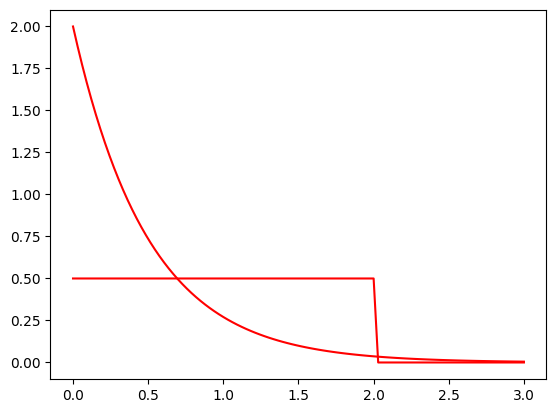

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import uniform
bins = np.linspace(0, 3, 30)
x = np.linspace(0, 3, 100)
fdp = expon.pdf(x, scale=1/2)
fdp2 = uniform.pdf(x,0, scale=2)
plt.plot(x, fdp, 'r-', label='FDP Teórica')
plt.plot(x, fdp2, 'r-', label='FDP Teórica')
plt.show()

In [ ]:
import numpy as np
## Ejemplo de muestreo por aceptación-rechazo

def aceptacion_rechazo(n_samples, lambda_exp):
    """
    Función para realizar muestreo por aceptación-rechazo.

    Args:
    n_samples : int
        Número de muestras a generar.
    lambda_exp : float
        Parámetro lambda de la distribución exponencial deseada.

    Returns:
    np.array
        Array de muestras generadas de la distribución exponencial.
    """
    samples = []
    c = lambda_exp  # Asumiendo que c debe ser lo suficientemente grande para cubrir la condición c*g(x) >= f(x).

    while len(samples) < n_samples:
        # Generar una muestra de la distribución propuesta (uniforme entre 0 y lambda_exp)
        X = np.random.uniform(0, 1 / lambda_exp)

        # Calcular la probabilidad de aceptación
        prob_aceptacion = lambda_exp * np.exp(-lambda_exp * X)

        # Decidir si aceptar o rechazar la muestra
        U = np.random.uniform(0, 1)
        if U < prob_aceptacion:
            samples.append(X)

    return np.array(samples)


In [ ]:
# Generar 1000 muestras de una distribución exponencial con lambda = 0.5
lambda_param = 0.5
generated_samples = aceptacion_rechazo(1000, lambda_param)

print(generated_samples[:10])  # Mostrar las primeras 10 muestras


[0.62495196 0.77784717 0.35746487 1.44125015 0.47003461 0.07319878
 0.99552197 0.18945356 1.02642664 1.50355287]
